
##CS286 Final exam
##Spring 2022
###Due: university-scheduled exam date of May 20 2022, 17:00pm (submission site stays open until 23:59pm)

You may work together with your project team, and submit one solution for all team members; you can also do the final on your own if you prefer. If you work in a team, all team members will get the same grade. Everyone on your team should contribute to the solution and understand the solution (not one person doing all the work). Oral examination may be requested.

You are given 14,004 protein sequences to classify, linked on the Canvas final page. 
We are going to use an open-access public dataset of protein sequences , originating from [DeepLoc](http://www.cbs.dtu.dk/services/DeepLoc-1.0/data.php). The dataset is a fasta file composed of headers and protein sequences. The header is composed of the accession number from Uniprot, the annotated subcellular localization and possibly a description field indicating if the protein was part of the test set. The subcellular localization includes an additional label, where S indicates soluble, M membrane and U unknown (you can ignore this label for our purposes). A sample of the data is as follows:

```

$ head deeploc_data.fasta 
>Q9H400 Cell.membrane-M test
MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP
>Q5I0E9 Cell.membrane-M
MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRTE



$ tail deeploc_data.fasta 
>V5NC32 Extracellular-S
MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVAGGGTAGLVVASRLSENSDWNILVIEAGPSNKDTPETRVPGLADSLPGSRTDWNYTTIPQDALGGRSLNYSRAKVLGGCSTHNGMVYTRGSEDDWNYWAEVTGDQALSWDSVLPIMKKAEKFSQDFSDQSVDGHIDPAVHGRDGLLSVVASYTNVSFNDLLLQTTKELSDEFPFKLDLNDGKPHELAWTQYTIDHNAERSSSATSYLETTGDNVHVLVNTHVTRIVSAGNGTNFRSVEFAVDSNSPKKVLQAKKELILSAGVIASPQVLMNSGIGGREELQAIGVDTLIDNPSVGKNLSDQAATLLMFDTTLPNTDYDVAAALTEWDKSRSGPMAHGARLNHLTWVRLPDDKLNGSDPSSGKDSPHIEFQFRQISHQLPPADVPNQVQLPDPDSIGVVLQFSVVNLYSISPGSVILNDNDPFANPMIDLNMFGDQKDIAILREGVRSARRMFSSPAFKDVINGTVYPPADVTSDEDLDAFLRTSAESYWHGVGTLSMSPQNASWGVVNPDFRVKGTSGLRVVDASVIPRAPAGHTQVPVYTFAEHASVLIAASYH
>P86368 Extracellular-S
SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFVHDCCYGNLPDCNPKSDRYKYKRVNGAIVCEQGTSCENRICECDKAAAICFRRNLNTYSKIYMLYPDFLCKGELKC
>P80156 Extracellular-S
TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTATCPTVKPHEQITCCSTDNCNPHPKMKQ
>Q8NIH1 Extracellular-S
MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSYMSSDDMKLKQPAIASLSGGNYVDTATEVVKRMMPGMTFRMADDHYVGESGISHLYFRQTMHGMDIDNADFNVNIGKDGKVLSFGHSFYTGPAPDRAPVEKRDFSGPMRAFHGACKALNLPINADKATIQTMNEHEVMFVGTSGAMSDPQGKLCYMAKEDGTLALTWRVETDMGDNWLLSYVDAKETDKVHNVVDYVSHATYQVYRWPIPDPTEGKREIVENPWNLKTSPFTWISDGKTNYTTTRGNNAIAQANFDGGEDYLNNYRPNSKNLKFEYPYAPNMSPPKSYIDASVTQLFYSANIVHDLYYMLGFTEKAGNFQVNNHGQGGKGNDFVILNAQDGSGTNNANFATPPDGKPGRMRVYIWTKAKPARDSSFEAGTVIHEYTHGLSNRLCGGPANSGCLNGMESGGMGEGWGDFFATAIRLKPNDNRNANYVHGEWVNNSPKGNRLYPYSTNLQTNPLVYTSCNKYNEVHAIGTVWCSILYEVLWNLIDKHGKNDGPTPVFENGVPNDGKYLAMKLVLDGMAIQPCKPTFVQARDAIIDADMNLTKGSNKCELWKAFAKRGLGVGAKYDPKNRTGSKAVPKECQ
>D4APA9 Extracellular-S
MGFITKAIPLALAAASVINGAEIMETRAGVQTLADKYIVVMNDGMTDKDFDSHRSWVNRTHRRRLIRRGAKAMGGMKHTYRFPTGLKGYSGHFDEQMINEISKRADVKYIERDARVQINAIEQQDNVPSWGLARVGSKEPGGTTYYYDGTAGEGSTAYVIDTGTDIQHEEFEGRATWGANFVDDMDMDCNGHGTHVSGTIGGKTFGVAKKSNVVAVKVLDCNGSGSNSGVIMGMEWATKDAQQKGADKAVANMSLGGAFSQASNDAAAAIAKGGVFLAVAAGNDNVDAADSSPASEPSICTVAASTEQDSKADFSNFGQVVDVYAPGDSITSAKPGGGSQVLSGTSMATPHVAGLGAYLIGLGKGGGPGLCDTIKQTAIDVIQNPGASTTSKLINNGSGIGFLSFPLNIYEEQWSKLFDL



$ egrep "^>" deeploc_data.fasta | wc
   14004   30781  319857


###These are the 11 subcellular localication annotations:

$ egrep "^>" deeploc_data.fasta | sed "s/^>.* //g" | sed "s/-.$//g" | sort | uniq
Cell.membrane
Cytoplasm
Cytoplasm-Nucleus
Endoplasmic.reticulum
Extracellular
Golgi.apparatus
Lysosome/Vacuole
Mitochondrion
Nucleus
Peroxisome
Plastid

```







##Task

Your task is to train machine learning that clasifies these proteins into those 11 subcellular localization groups (as we did in the worksheets, except for amino acid sequences this time). You can use amino acids or k-mers of amino acids as words (choose k yourself). Train **any three ML methods amongst those mentioned below** (any 3 that you prefer, they can also be from the same bulletpoint) so you can compare them:

- Any ML methods we saw in the class (SGD, neural nets, etc). Train the model to clasify the proteins into the 11 groups. Evaluate the classification result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. See [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

- A simple clustering, such as k-means (unsupervised clustering, the same method used in vector quantization) to cluster into 11 groups. Evaluate result by assigning the majority class to each cluster, then counting how many members of each cluster belong to classes other than the assigned one.

- Use the ProtBERT that is given [here](https://github.com/aws-samples/amazon-sagemaker-protein-classification). Evaluate result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. This is sample code for BERT that does the assigned task, though you may google as well to find code.

- You may also use ML methods we didn't cover in detail in class, such as SVMs or decision trees or random forests, or others. 

##Answer this question

Which of the 2 methods you compared gave a better result for separating proteins into the 11 subcellular localization classes? Explain in your answer why one method gave better results than another. If the metrics (Accuracy/Precision/Recall) are inconclusive as to which method performed better overall - for example if one method has better precision but another has better recall - explain this in your answer.

## Below is some code I provide that you may find helpful

In [ ]:
#This code is adapted from WS8 - Primer of Deep Learning in Genomics
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
# The LabelEncoder encodes a sequence of nucleotids bases or amino acids (letters) as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

sequences = ["AAAMGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP"]
# print(Counter(sequences[0]))
for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  # print('1:',integer_encoded)
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  # print('11:',integer_encoded)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  # print('2:',one_hot_encoded)
  input_features.append(one_hot_encoded.toarray())
  print('3:',len(input_features[0]), len(input_features[0][0]), input_features)

# print(str(input_features[0]))

3: 298 20 [array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])]


In [ ]:
#Upload the deeploc_data.fasta file. Will take a few minutes.

from google.colab import files
uploaded = files.upload()


Saving deeploc_data.fasta to deeploc_data.fasta


In [ ]:
#This code is adapted from WS9 - RBP_binding_site_prediction in order to read in fasta or faa files. 
#This reads in the entire file and saves the labels in the sequence headers as classes.
#You may want to split the training from the test sequences in the data file, then read in a separate training and test dataset.

def read_seq_graphprot(seq_file):
    seq_list = []
    labels = []
    names = []
    seq = ''
    for line2 in seq_file:
            line = line2.decode().strip()
            if line[0] == '>':
                name = line[1:]
                names.append(name)
                label = name.split(" ")[1][:-2]
                labels.append(label)
            else:
                seq = line[:-1].upper()
                #seq = seq.replace('T', 'U')
                seq_list.append(seq)
                
    return seq_list, labels, names


def read_data_file(file = None, train = True):
    data = dict()
    seqs, labels, names = read_seq_graphprot(file)
        
    data["seq"] = seqs
    data["class_labels"] = np.array(labels)
    data["names"] = np.array(names)

    
    return data



In [ ]:
#Preprocess the data
import io
data = read_data_file(io.BytesIO(uploaded['deeploc_data.fasta']))

In [ ]:
#Check what is in your data
print(len(data['seq']))
data["seq"][0:4]


14004


['MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASL',
 'MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRT',
 'MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFEDQYTPTIEDFHRKVYNIHGDMYQLDILDTSGNHPFPAMRRLSILTGDVFILVFSLDSRESFDEVKRLQKQILEVKSCLKNKTKE

In [ ]:
data["class_labels"]


array(['Cell.membrane', 'Cell.membrane', 'Cell.membrane', ...,
       'Extracellular', 'Extracellular', 'Extracellular'], dtype='<U21')

In [ ]:
set(data["class_labels"])

{'Cell.membrane',
 'Cytoplasm',
 'Cytoplasm-Nucleus',
 'Endoplasmic.reticulum',
 'Extracellular',
 'Golgi.apparatus',
 'Lysosome/Vacuole',
 'Mitochondrion',
 'Nucleus',
 'Peroxisome',
 'Plastid'}

In [ ]:
test = 0
for item in enumerate(data["names"]):
    # print(item[1])
    if 'test' in item[1]:
        test += 1
print(test, len(data['names']))
data["names"]


2773 14004


array(['Q9H400 Cell.membrane-M test', 'Q5I0E9 Cell.membrane-M',
       'P63033 Cell.membrane-M', ..., 'P80156 Extracellular-S',
       'Q8NIH1 Extracellular-S', 'D4APA9 Extracellular-S'], dtype='<U37')

# Pre-processing data

In [ ]:
from statistics import mean
from collections import Counter

# Padding each sequence to same length
# mean length
mean_len = int(mean([len(k) for k in data['seq']]))
print(mean_len)
sequences_data = []
print(type(data['seq'][0]))
common = {'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'}
B = 0
U = 0
X = 0
H = 0
count = 0
for sequence in data['seq']:
    B += sequence.count('B')
    U += sequence.count('U')
    X += sequence.count('X')
    H += sequence.count('H')
    count += len(sequence)
    if len(sequence) > mean_len:
        new_sequence = sequence[:mean_len]
    else:
        new_sequence = sequence.ljust(mean_len, 'Z')
        if len(sequence) < 40:
            print(sequence)
            print(new_sequence)
    sequences_data.append(new_sequence)

print('B U X H:', B, U, X, H, (count - 107)/20)
print(len(sequences_data))
print(Counter([len(k) for k in sequences_data]))


521
<class 'str'>
GCIPSFGECAWFSGESCCTGICKWVFFTSKFMCRRVWGK
GCIPSFGECAWFSGESCCTGICKWVFFTSKFMCRRVWGKZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ
MKITSALVLLFAGVAFAQSADPNTNENKNVIHINSPSAA
MKITSALVLLFAGVAFAQSADPNTNENKNVIHINSPSAAZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ

In [ ]:
# Only consider common 20 types of amino acid and integer encoding
aa_set = set()
for sequence in sequences_data:
    for aa in sequence:
        aa_set.add(aa)
print(len(aa_set), aa_set)
AA = sorted(list(aa_set))
print(AA)

24 {'Q', 'L', 'I', 'S', 'W', 'D', 'C', 'U', 'R', 'G', 'M', 'B', 'E', 'Y', 'Z', 'A', 'V', 'H', 'F', 'P', 'T', 'N', 'K', 'X'}
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
common = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa_dict = {k: v+1 for v, k in enumerate(common)}
aa_dict


{'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [ ]:
# Integer Encode padded / trimmed sequences with mean length

In [ ]:
def integer_encode(sequences):
    integer_encoded = []
    for sequence in sequences:
        encoded = []
        for aa in sequence:
            if aa in aa_dict:
                encoded.append(aa_dict[aa])
            else:
                encoded.append(0)
        integer_encoded.append(encoded)
    return integer_encoded

In [ ]:
# One hot encoding 
def one_hot_encode(integer_encoded):
    input_features = []
    for row in integer_encoded:
        one_hot_encoded = []
        # print(row)
        for num in row:
            lst = [0 for i in range(len(aa_dict))]
            if num > 0:
              lst[num - 1] = 1
            # print(lst)
            one_hot_encoded.append(lst)
        input_features.append(one_hot_encoded)
    return input_features


In [ ]:
import numpy as np
import pandas as pd
from statistics import mean
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# process labels
def one_hot_encode_label():
    labels = []
    integer_encoder = LabelEncoder()  
    one_hot_encoder = OneHotEncoder(categories='auto') 
    # for label in y[:10]:
    integer_encoded = integer_encoder.fit_transform(data['class_labels'])
    # print('1:', max(integer_encoded), integer_encoded)
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    # print('11:',integer_encoded)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    # print('2:',one_hot_encoded.toarray())
    label = one_hot_encoded.toarray()
    labels.append(label)

    return labels

In [ ]:
# Get pre-processed data
integer_encoded = integer_encode(sequences_data)
print(len(integer_encoded))
input_features = one_hot_encode(integer_encoded)
input_features = np.array(input_features)



14004


In [ ]:
print(type(input_features))
print(len(input_features), len(input_features[0]), len(input_features[0][0]))
print(input_features[:2])
print('\n', input_features[0][:5])

<class 'numpy.ndarray'>
14004 521 20
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [ ]:
labels = one_hot_encode_label()
labels = np.array(labels)[0]

In [ ]:
print(type(labels), '\n', labels)
print('\n', labels[:4])

<class 'numpy.ndarray'> 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Method 1: Bidirectional LSTM

In [ ]:
from sklearn.model_selection import train_test_split

# split training and testing (0.8, 0.2)
X_train, X_test, y_train, y_test = train_test_split(input_features, 
                                                    labels, 
                                                    test_size = 0.20,
                                                    random_state = 40)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(11203, 521, 20) (2801, 521, 20)
(11203, 11) (2801, 11)


In [ ]:
# # Separate training and testing data
# X_train1 = []
# y_train1 = []
# X_test1 = []
# y_test1 = []

# # for i in range(100):
# for i in range(len(data['names'])):
#     if 'test' in data['names'][i]:
#         X_test1.append(input_features[i])
#         y_test1.append(labels[i])
#     else:
#         X_train1.append(input_features[i])
#         y_train1.append(labels[i])



In [ ]:
# X_train = np.array(X_train1)
# y_train = np.array(y_test1)
# X_test = np.array(X_test1)
# y_test = np.array(y_test1)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(11203, 521, 20) (2801, 521, 20)
(11203, 11) (2801, 11)


In [ ]:
# x_input = Input(shape=(100,))
# emb = Embedding(21, 128, input_length=max_length)(x_input)
# bi_rnn = Bidirectional(CuDNNLSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(emb)
# x = Dropout(0.3)(bi_rnn)

# # softmax classifier
# x_output = Dense(1000, activation='softmax')(x)

# model1 = Model(inputs=x_input, outputs=x_output)
# model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Bidirectional
from keras.layers import Convolution1D, MaxPooling1D, Dropout, Flatten, Dense, Activation

forward_lstm = LSTM(units=320, return_sequences=True)
backward_lstm = LSTM(units=320, input_dim=320, return_sequences=True, go_backwards=True)
brnn = Bidirectional(forward_lstm, backward_layer=backward_lstm)

print('building model')

model = Sequential()
model.add(Convolution1D(activation="relu", 
                        input_shape=(521, 20), 
                        padding="valid", strides=1, 
                        filters=32, kernel_size=12))

model.add(MaxPooling1D(strides=13, pool_size=13))

model.add(Dropout(0.2))

model.add(brnn)

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(input_dim=75*640, units=640))
model.add(Activation('relu'))

model.add(Dense(input_dim=640, units=11))
model.add(Activation('softmax'))

print('compiling model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['cosine_similarity'])

print('running at most 30 epochs')

checkpointer = ModelCheckpoint(filepath="DanQ_bestmodel.hdf5", verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='loss', patience=5, verbose=1)

model.fit(X_train, y_train, batch_size=256, epochs=30,
          shuffle=True,
          # validation_split=0.25,
          callbacks=[checkpointer,earlystopper])
model.summary()

building model
compiling model
running at most 30 epochs
Epoch 1/30
44/44 [==============================] - 33s 396ms/step - loss: 0.2724 - cosine_similarity: 0.4386
Epoch 2/30
44/44 [==============================] - 17s 380ms/step - loss: 0.2204 - cosine_similarity: 0.5378
Epoch 3/30
44/44 [==============================] - 16s 371ms/step - loss: 0.2014 - cosine_similarity: 0.5879
Epoch 4/30
44/44 [==============================] - 17s 396ms/step - loss: 0.1866 - cosine_similarity: 0.6239
Epoch 5/30
44/44 [==============================] - 17s 387ms/step - loss: 0.1764 - cosine_similarity: 0.6469
Epoch 6/30
44/44 [==============================] - 16s 373ms/step - loss: 0.1662 - cosine_similarity: 0.6718
Epoch 7/30
44/44 [==============================] - 17s 386ms/step - loss: 0.1598 - cosine_similarity: 0.6869
Epoch 8/30
44/44 [==============================] - 17s 390ms/step - loss: 0.1513 - cosine_similarity: 0.7037
Epoch 9/30
44/44 [==============================] - 17s 387ms/s

In [ ]:
tresults = model.evaluate(X_test, y_test)
print(tresults) 

88/88 [==============================] - 4s 36ms/step - loss: 0.1975 - cosine_similarity: 0.7001
[0.1974879801273346, 0.7001370191574097]


In [ ]:
preds = model.predict(X_test)
print(preds)

[[1.28785127e-09 7.18353760e-07 1.28840725e-08 ... 9.99998569e-01
  8.67978356e-10 8.24200343e-12]
 [3.73294228e-03 9.89547372e-03 4.63164895e-07 ... 3.18841593e-08
  1.64931174e-03 3.13245953e-04]
 [1.22743904e-08 1.11449970e-06 1.23494947e-11 ... 2.08496349e-08
  7.36013739e-09 3.42713719e-10]
 ...
 [9.63498496e-06 9.95854497e-01 6.92561798e-06 ... 6.15531870e-04
  1.97314890e-03 2.74858553e-06]
 [1.22981803e-09 3.98305300e-09 2.35716477e-08 ... 8.99327830e-08
  1.35306886e-08 5.36771960e-10]
 [9.44189438e-09 1.17777905e-04 2.59295163e-08 ... 9.99879956e-01
  6.82764782e-12 3.15571180e-11]]


In [ ]:
preds1 = np.zeros_like(preds)
preds1[np.arange(len(preds)), preds.argmax(1)] = 1
# preds1 = (preds == np.max(preds))
preds = preds1
preds[:20]


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

In [ ]:
y_test[:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

In [ ]:
correct = 0
for i in range(len(y_test)):
    flag = True
    for j in range(len(y_test[0])):
        # print(preds[i][j], y_test[i][j])
        if preds[i][j] != y_test[i][j]:
            flag = False
    if flag:
        correct += 1
print('\n', correct, correct/len(y_test))



 1881 0.6715458764726884


In [ ]:
# keras.mean(keras.equal(keras.argmax(y_test, axis=-1), keras.argmax(preds, axis=-1)))

In [ ]:
# y_true = y_test
# y_pred = preds

# labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

# conf_mat_dict={}

# for label_col in range(len(labels)):
#     y_true_label = y_true[:, label_col]
#     y_pred_label = y_pred[:, label_col]
#     conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


# for label, matrix in conf_mat_dict.items():
#     print("Confusion matrix for label {}:".format(label))
#     print(matrix)

In [ ]:
# one hot to digit
Ytrue = [np.argmax(t) for t in y_test ]
Ypred = [np.argmax(t) for t in preds ]
print(Ypred,'\n', Ytrue)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(Ytrue, Ypred)
cf

array([[172,  15,   0,  32,  10,   2,   6,   3,  15,   1,   1],
       [  5, 291,   2,   7,   3,   0,   2,  21, 156,   1,   8],
       [  0,   8,   6,   0,   0,   0,   0,   2,  15,   0,   0],
       [ 18,   7,   0, 100,  15,   5,   9,   2,   8,   0,   0],
       [  9,  15,   0,  10, 324,   3,   2,   2,   4,   0,   0],
       [  7,  12,   0,   8,   1,  18,   2,   1,  10,   1,   0],
       [ 12,   5,   0,  21,   6,   2,  22,   1,   7,   0,   1],
       [  8,  29,   1,   9,   8,   0,   5, 229,  17,   0,  16],
       [  5, 192,   0,   8,   7,   0,   5,  22, 588,   0,   6],
       [  2,  10,   0,   1,   0,   0,   0,   3,   4,  10,   0],
       [  1,  15,   0,   3,   0,   0,   1,  16,   4,   1, 121]])

In [ ]:
from sklearn.metrics import classification_report

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(Ytrue, Ypred))

Accuracy:  0.6715458764726884
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       257
           1       0.49      0.59      0.53       496
           2       0.67      0.19      0.30        31
           3       0.50      0.61      0.55       164
           4       0.87      0.88      0.87       369
           5       0.60      0.30      0.40        60
           6       0.41      0.29      0.34        77
           7       0.76      0.71      0.73       322
           8       0.71      0.71      0.71       833
           9       0.71      0.33      0.45        30
          10       0.79      0.75      0.77       162

    accuracy                           0.67      2801
   macro avg       0.66      0.55      0.58      2801
weighted avg       0.68      0.67      0.67      2801



[Text(0, 0.5, 'Cell.membrane'),
 Text(0, 1.5, 'Cytoplasm'),
 Text(0, 2.5, 'Cytoplasm-Nucleus'),
 Text(0, 3.5, 'Endoplasmic.reticulum'),
 Text(0, 4.5, 'Extracellular'),
 Text(0, 5.5, 'Golgi.apparatus'),
 Text(0, 6.5, 'Lysosome/Vacuole'),
 Text(0, 7.5, 'Mitochondrion'),
 Text(0, 8.5, 'Nucleus'),
 Text(0, 9.5, 'Peroxisome'),
 Text(0, 10.5, 'Plastid')]

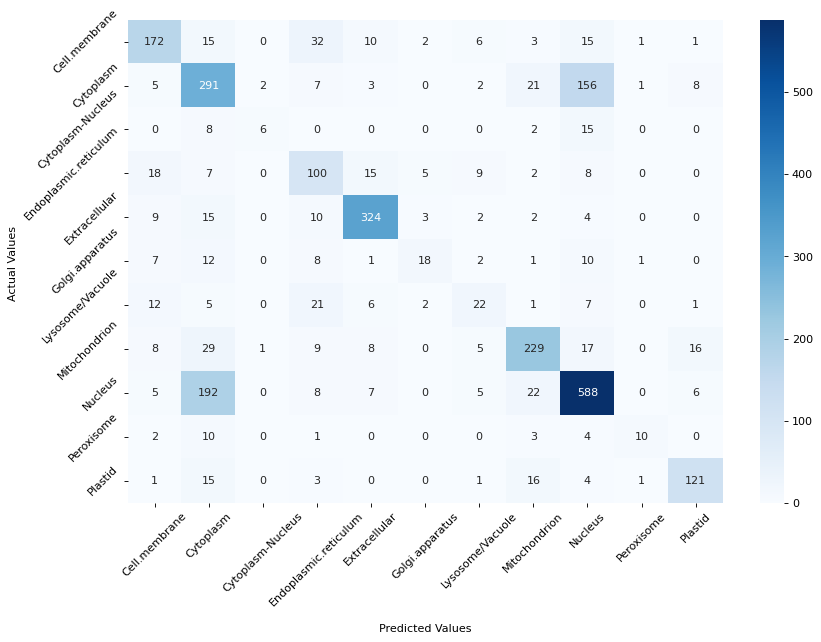

In [ ]:
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
ax = sns.heatmap(cf, annot=True,cmap=plt.cm.Blues, fmt=".0f")

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
class_labels = ['Cell.membrane','Cytoplasm','Cytoplasm-Nucleus',
                'Endoplasmic.reticulum','Extracellular','Golgi.apparatus',
                'Lysosome/Vacuole','Mitochondrion','Nucleus','Peroxisome','Plastid']
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=45)

